In [1]:
import pandas as pd 
import numpy as np 


In [3]:
df = pd.read_csv(r"C:\Users\daphn\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
# Check missing values in each column
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Total duplicate rows:", duplicates)


Total duplicate rows: 0


In [10]:
len(df)

7043

In [11]:
# Check number of unique customer IDs
print("Unique customer IDs:", df['customerID'].nunique())

# Verify if all customer IDs are unique
if len(df) == df['customerID'].nunique():
    print(" All customer IDs are unique.")
else:
    print("There are duplicate customer IDs.")


Unique customer IDs: 7043
 All customer IDs are unique.


In [14]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [15]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


In [16]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
# EDA

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_style("whitegrid")

# Make plots bigger and clearer
plt.rcParams['figure.figsize'] = (8, 5)


C:\Users\daphn\AppData\Local\Temp\ipykernel_28348\3016350178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette=['#1f77b4', '#ff7f0e'])


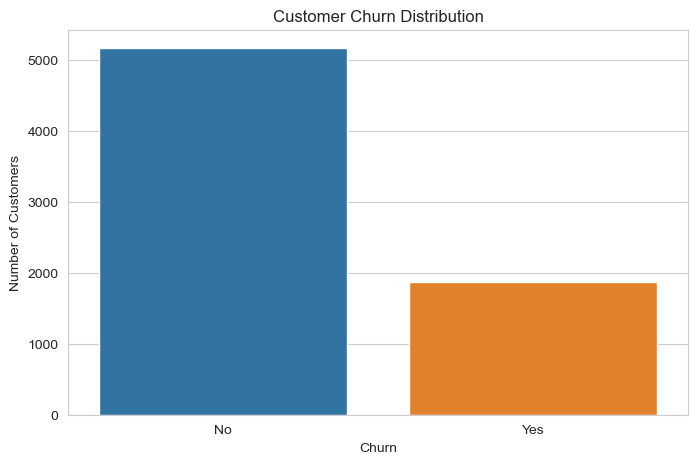

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [18]:
# Countplot for Churn
sns.countplot(x='Churn', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

# Percentage of churn
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(churn_rate)


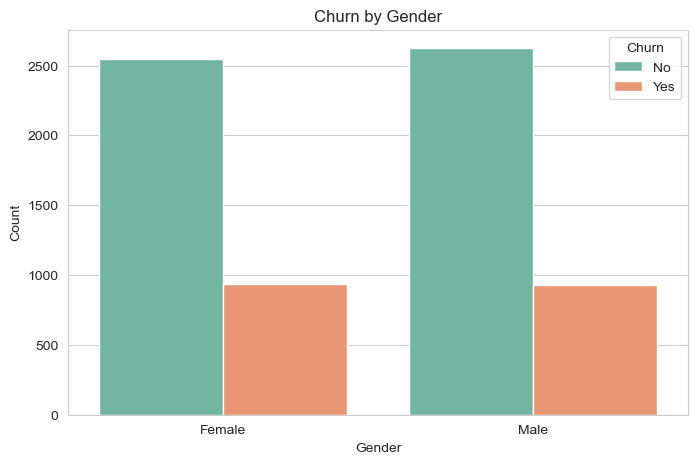

In [19]:
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


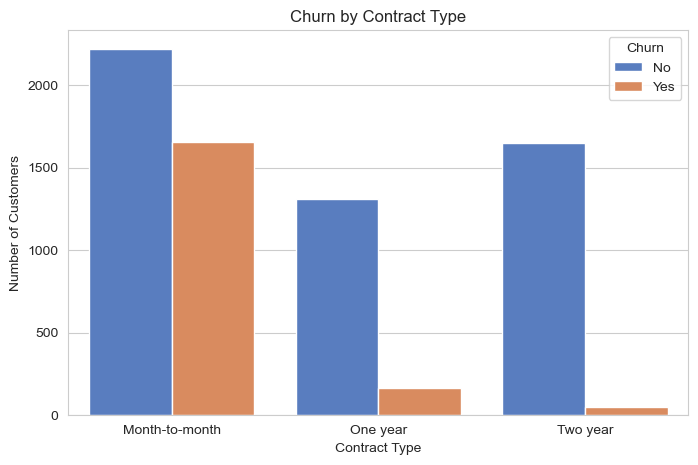

In [20]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='muted')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()


C:\Users\daphn\AppData\Local\Temp\ipykernel_28348\1097020479.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')


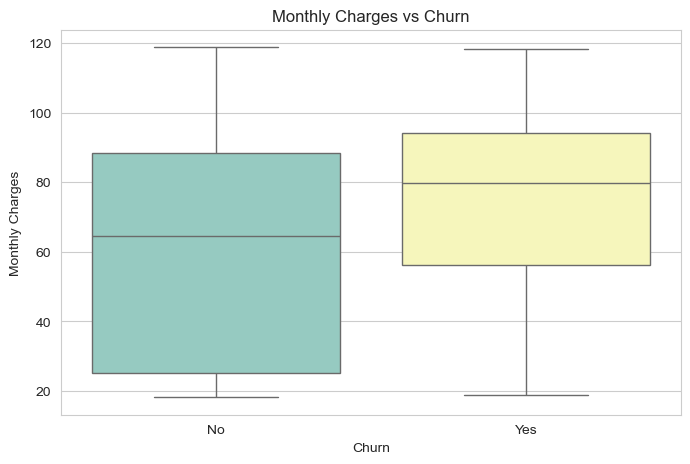

In [21]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set3')
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


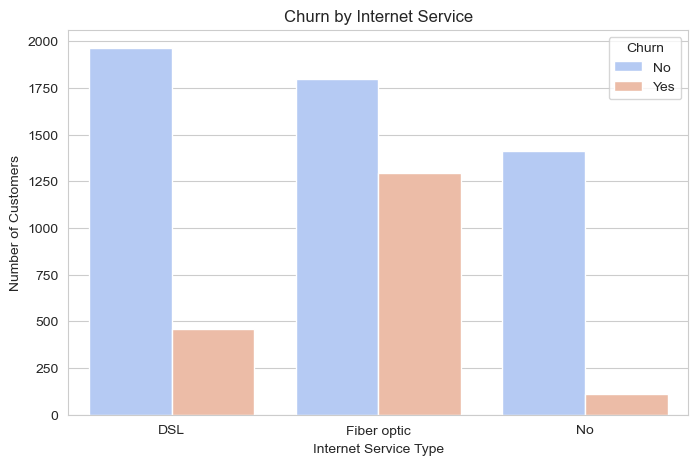

In [24]:
sns.countplot(x='InternetService', hue='Churn', data=df, palette='coolwarm')
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.show()


In [26]:
# PREPARING DATA FOR MODELLING 

In [27]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [28]:
import pandas as pd

# Make a copy of dataset
data = df.copy()

# --------------------------
# 1. Drop unnecessary columns
# --------------------------
data.drop('customerID', axis=1, inplace=True)

# -----------------------------------
# 2. Convert binary categorical columns to 0/1
# -----------------------------------
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
               'PaperlessBilling', 'SeniorCitizen', 'Churn']

for col in binary_cols:
    if col in data.columns:
        data[col] = data[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# -----------------------------------
# 3. One-Hot Encode multi-category columns
# -----------------------------------
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

data = pd.get_dummies(data, columns=multi_cat_cols, drop_first=True)

# --------------------------
# 4. Check final data types
# --------------------------
print("Data types after encoding:\n", data.dtypes)

# --------------------------
# 5. Separate Features & Target
# --------------------------
X = data.drop('Churn', axis=1)   # Features
y = data['Churn']                # Target

print("\nShape of Feature Set (X):", X.shape)
print("Shape of Target (y):", y.shape)

# --------------------------
# 6. Final check: all numeric?
# --------------------------
non_numeric = X.select_dtypes(include=['object']).columns
if len(non_numeric) == 0:
    print("\n✅ All features are numeric. Dataset ready for modeling!")
else:
    print("\n⚠️ Non-numeric columns remaining:", list(non_numeric))


Data types after encoding:
 gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                     

In [31]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False
5,0,0,0,0,8,1,1,99.65,820.50,1,...,False,False,True,False,True,False,False,False,True,False
6,1,0,0,1,22,1,1,89.10,1949.40,0,...,False,False,True,False,False,False,False,True,False,False
7,0,0,0,0,10,0,0,29.75,301.90,0,...,False,False,False,False,False,False,False,False,False,True
8,0,0,1,0,28,1,1,104.80,3046.05,1,...,True,False,True,False,True,False,False,False,True,False
9,1,0,0,1,62,1,0,56.15,3487.95,0,...,False,False,False,False,False,True,False,False,False,False


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (5634, 30)
Testing set: (1409, 30)


In [33]:
from sklearn.linear_model import LogisticRegression

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [34]:
# Check missing values in the dataset
missing = data.isnull().sum()
print(missing[missing > 0])


TotalCharges    11
dtype: int64


In [35]:
# Fill missing TotalCharges with median
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())


In [36]:
# Check missing values in the dataset
missing = data.isnull().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


C:\Users\daphn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8048261178140526
Precision: 0.6561514195583596
Recall: 0.5561497326203209
F1 Score: 0.6020260492040521

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [41]:
!pip install xgboost


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 1.3/56.8 MB 7.7 MB/s eta 0:00:08
   - -------------------------------------- 2.4/56.8 MB 6.0 MB/s eta 0:00:10
   -- ------------------------------------- 3.9/56.8 MB 6.9 MB/s eta 0:00:08
   ---- ----------------------------------- 5.8/56.8 MB 7.3 MB/s eta 0:00:07
   ----- ---------------------------------- 7.3/56.8 MB 7.4 MB/s eta 0:00:07
   ------ --------------------------------- 8.7/56.8 MB 7.4 MB/s eta 0:00:07
   ------- -------------------------------- 10.2/56.8 MB 7.2 MB/s eta 0:00:07
   -------- ------------------------------- 11.8/56.8 MB 7.3 MB/s eta 0:00:07
   --------- ------------------------------ 13.4/56.8 MB 7.3 MB/s eta 0:00:06
   ---------- ----------------------------- 14.9/56.8 MB 7.3 MB/s eta 0:00:06
   ----------- ---------------------------- 16.5/56.8 MB 7.4 MB/s eta 0:00:06
   ------------ --------------------------- 18.4/56.8 MB 7.4 MB/s eta 0:00:06


In [42]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [43]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [50]:
model_xgb = XGBClassifier(
    n_estimators=1000,          # Number of trees
    learning_rate=0.1,         # Step size
    max_depth=5,               # Tree depth
    subsample=0.8,             # Random sampling for training
    colsample_bytree=0.8,      # Random sampling for features
    eval_metric='logloss',     # Metric for binary classification
    use_label_encoder=False,
    scale_pos_weight=(len(y_train)-sum(y_train))/sum(y_train)  # Handle imbalance
)

model_xgb.fit(X_train, y_train)


C:\Users\daphn\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:24:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [51]:
y_pred = model_xgb.predict(X_test)
y_pred_prob = model_xgb.predict_proba(X_test)[:, 1]


In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7750177430801988
Precision: 0.5696821515892421
Recall: 0.6229946524064172
F1 Score: 0.5951468710089399

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.62      0.60       374

    accuracy                           0.78      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.78      0.78      1409



C:\Users\daphn\AppData\Local\Temp\ipykernel_28348\3171987808.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')


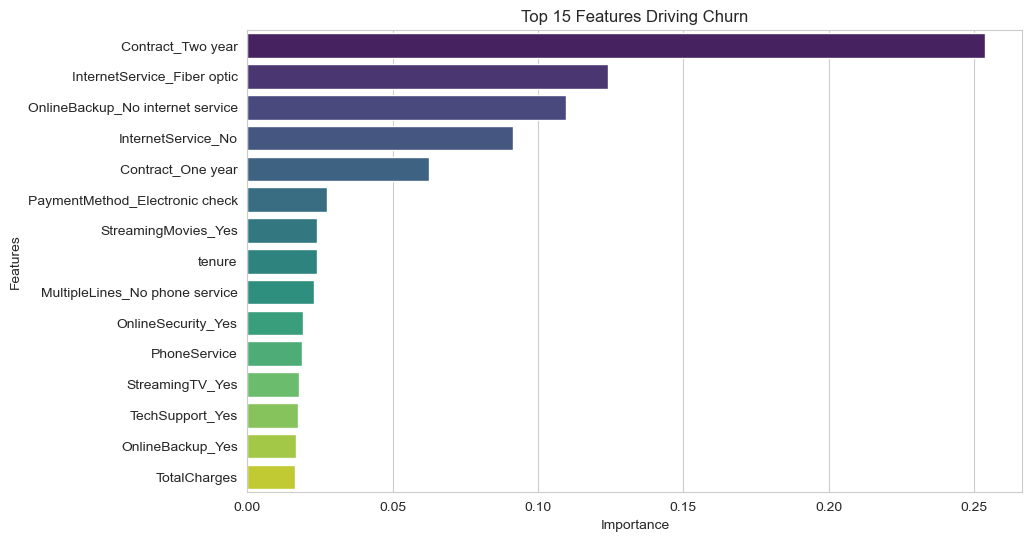

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Features Driving Churn')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Accuracy : 0.7672107877927609
Precision: 0.5442307692307692
Recall   : 0.7566844919786097
F1 Score : 0.6331096196868009

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1035
           1       0.54      0.76      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



C:\Users\daphn\AppData\Local\Temp\ipykernel_28348\243138434.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')


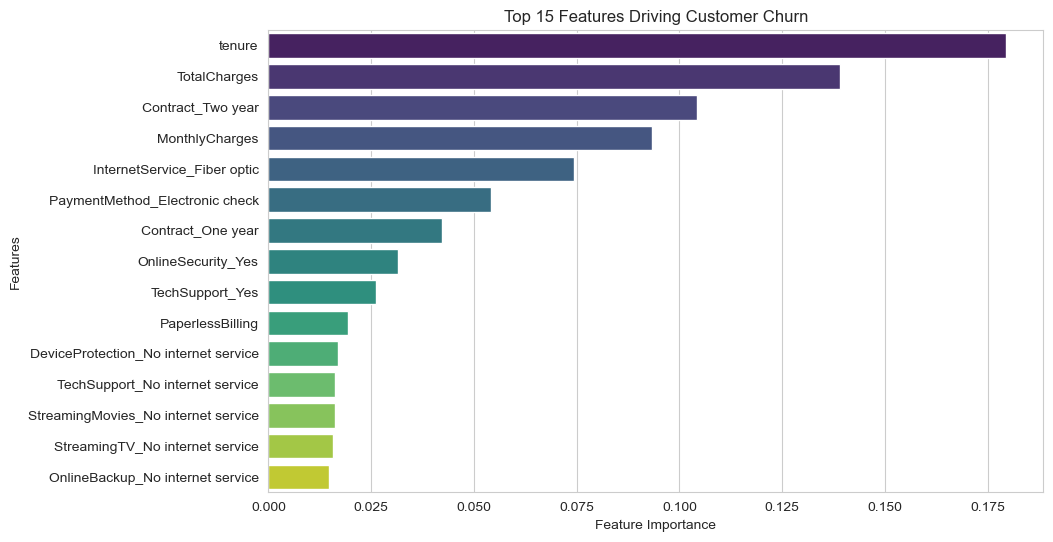

In [59]:
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

X = data.drop('Churn', axis=1)
y = data['Churn']


# 2. Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


rf_model = RandomForestClassifier(
    n_estimators=500,        # Number of trees
    max_depth=10,            # Depth of each tree
    min_samples_split=5,     # Minimum samples required to split a node
    min_samples_leaf=3,      # Minimum samples in leaf node
    random_state=42,
    class_weight='balanced'  # Handles churn imbalance
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title("Top 15 Features Driving Customer Churn")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [60]:
import pandas as pd

# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top 15 features
feature_importance.head(15)


,Feature,Importance
4,tenure,0.179580
8,TotalCharges,0.139097
26,Contract_Two year,0.104239
7,MonthlyCharges,0.093410
11,InternetService_Fiber optic,0.074253
28,PaymentMethod_Electronic check,0.054155
25,Contract_One year,0.042228
14,OnlineSecurity_Yes,0.031602
20,TechSupport_Yes,0.026185
6,PaperlessBilling,0.019393


In [61]:
# Add churn probability from the best model (e.g., Random Forest)
data['Churn_Probability'] = rf_model.predict_proba(X)[:, 1]

# Create churn risk categories
def churn_risk(prob):
    if prob >= 0.7:
        return 'High Risk'
    elif prob >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

data['Churn_Risk'] = data['Churn_Probability'].apply(churn_risk)




In [62]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Probability,Churn_Risk
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,True,False,0.712898,High Risk
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,True,0.084003,Low Risk
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,True,0.685796,Medium Risk
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,False,False,False,0.071900,Low Risk
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,True,False,0.833257,High Risk


In [64]:
data.to_csv(r"C:\Users\daphn\OneDrive\Documents\Projects\Churn project\Telco_Churn_Final.csv", index=False)
print("✅ Final dataset exported successfully!")


✅ Final dataset exported successfully!


In [73]:
import pandas as pd

# Get feature importance from the trained Random Forest model
importances = rf_model.feature_importances_
features = X.columns

feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# Save to CSV
feature_importance.to_csv(r"C:\Users\daphn\OneDrive\Documents\Projects\Churn project\feature_importance.csv", index=False)
print(" Feature importance exported successfully!")


 Feature importance exported successfully!
